In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
TRAIN_DIR = '/Users/user/Desktop/AI-projects/archive/train/train/'
TEST_DIR = '/Users/user/Desktop/AI-projects/archive/test/test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file

            if filepath.endswith(".jpg"):
                image_paths.append(filepath)
                labels.append(filepath.split('/')[-2])
    
    
            #print(labels, "Completed")
        
    return image_paths, labels    

In [4]:
#convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

#shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,image,label
0,/Users/user/Desktop/AI-projects/archive/train/...,happy
1,/Users/user/Desktop/AI-projects/archive/train/...,angry
2,/Users/user/Desktop/AI-projects/archive/train/...,sad
3,/Users/user/Desktop/AI-projects/archive/train/...,angry
4,/Users/user/Desktop/AI-projects/archive/train/...,fear


In [5]:
train['image'][0]

'/Users/user/Desktop/AI-projects/archive/train/train/happy/Training_34747187.jpg'

In [6]:
#convert into dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

,image,label
0,/Users/user/Desktop/AI-projects/archive/test/t...,happy
1,/Users/user/Desktop/AI-projects/archive/test/t...,happy
2,/Users/user/Desktop/AI-projects/archive/test/t...,happy
3,/Users/user/Desktop/AI-projects/archive/test/t...,happy
4,/Users/user/Desktop/AI-projects/archive/test/t...,happy


In [7]:
##exploratory data analysis

<Axes: xlabel='label', ylabel='count'>

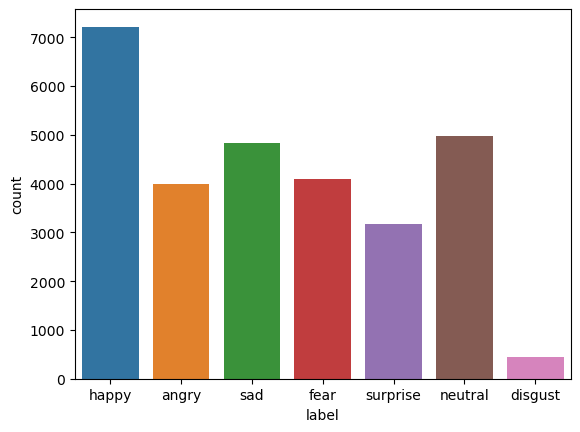

In [8]:
sns.countplot(data=train, x="label")

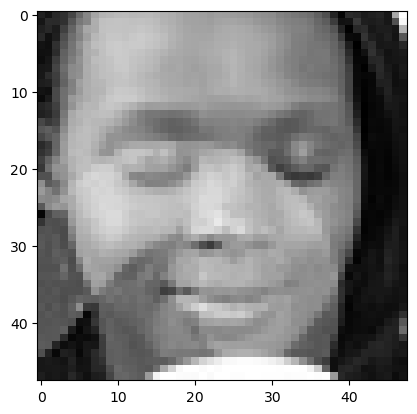

In [9]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

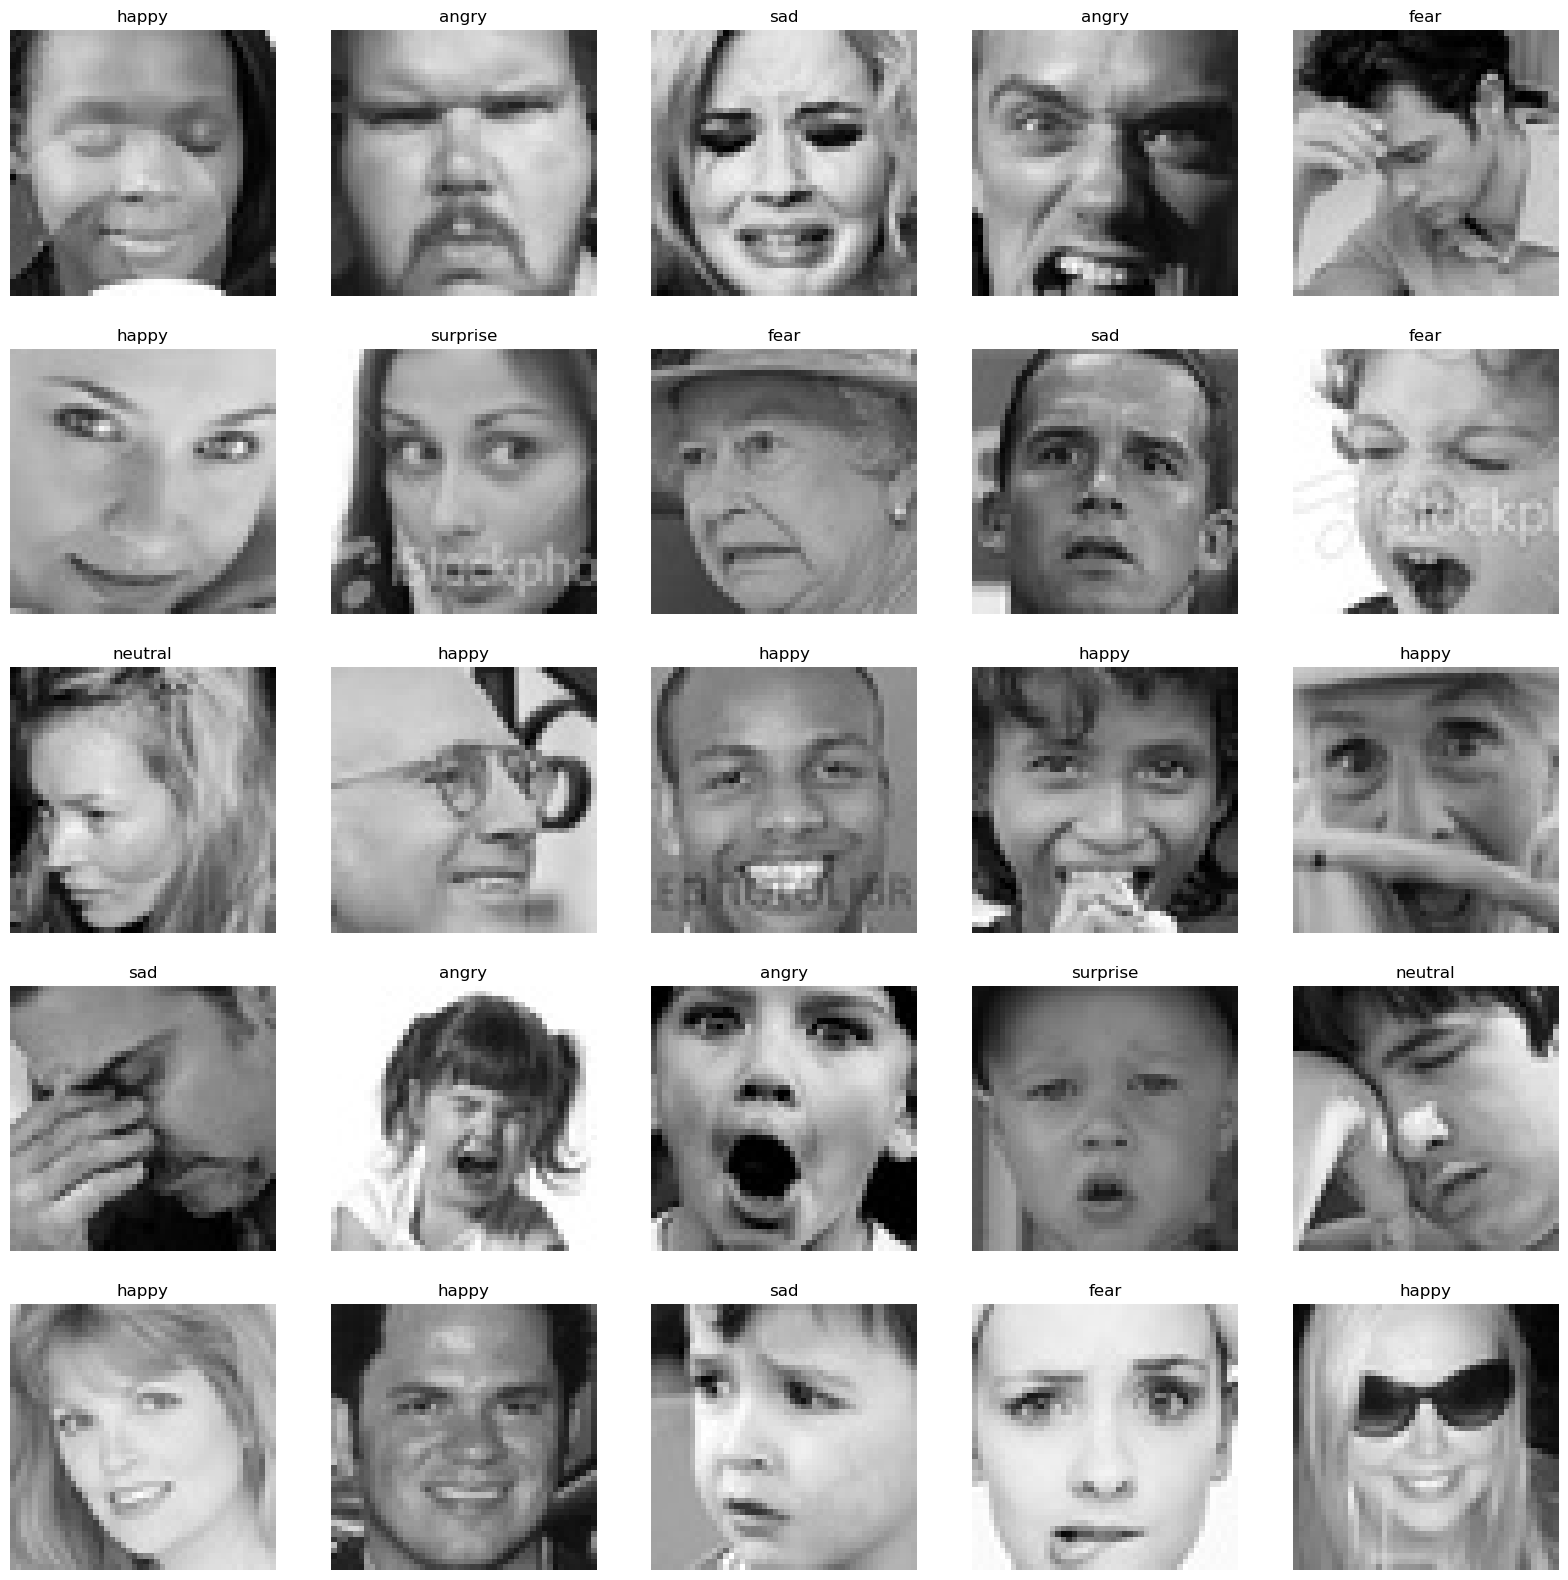

In [15]:
#to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
               

In [16]:
###feature extraction

In [19]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [20]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [21]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [22]:
##normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test= le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [27]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
#config
input_shape = (48, 48, 1)
output_class = 7

In [29]:
###model creation

In [31]:
model = Sequential()
#convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [32]:
#train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 [==============================] - 421s 2s/step - loss: 1.8226 - accuracy: 0.2464 - val_loss: 1.8025 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 440s 2s/step - loss: 1.7715 - accuracy: 0.2649 - val_loss: 1.6970 - val_accuracy: 0.2910
Epoch 3/100
225/225 [==============================] - 385s 2s/step - loss: 1.6591 - accuracy: 0.3317 - val_loss: 1.4916 - val_accuracy: 0.4079
Epoch 4/100
225/225 [==============================] - 401s 2s/step - loss: 1.5180 - accuracy: 0.4060 - val_loss: 1.3955 - val_accuracy: 0.4625
Epoch 5/100
225/225 [==============================] - 386s 2s/step - loss: 1.4380 - accuracy: 0.4417 - val_loss: 1.3301 - val_accuracy: 0.4809
Epoch 6/100
225/225 [==============================] - 391s 2s/step - loss: 1.4006 - accuracy: 0.4619 - val_loss: 1.2732 - val_accuracy: 0.5117
Epoch 7/100
225/225 [==============================] - 391s 2s/step - loss: 1.3645 - accuracy: 0.4750 - val_loss: 1.2594 - val_accuracy:

225/225 [==============================] - 390s 2s/step - loss: 0.9158 - accuracy: 0.6606 - val_loss: 1.0259 - val_accuracy: 0.6190
Epoch 58/100
225/225 [==============================] - 433s 2s/step - loss: 0.9140 - accuracy: 0.6579 - val_loss: 1.0228 - val_accuracy: 0.6222
Epoch 59/100
225/225 [==============================] - 415s 2s/step - loss: 0.9082 - accuracy: 0.6606 - val_loss: 1.0287 - val_accuracy: 0.6197
Epoch 60/100
225/225 [==============================] - 433s 2s/step - loss: 0.8939 - accuracy: 0.6677 - val_loss: 1.0231 - val_accuracy: 0.6229
Epoch 61/100
225/225 [==============================] - 440s 2s/step - loss: 0.8956 - accuracy: 0.6665 - val_loss: 1.0306 - val_accuracy: 0.6212
Epoch 62/100
225/225 [==============================] - 397s 2s/step - loss: 0.8986 - accuracy: 0.6632 - val_loss: 1.0207 - val_accuracy: 0.6236
Epoch 63/100
225/225 [==============================] - 416s 2s/step - loss: 0.8833 - accuracy: 0.6717 - val_loss: 1.0147 - val_accuracy: 0.631

In [ ]:
##plot the results

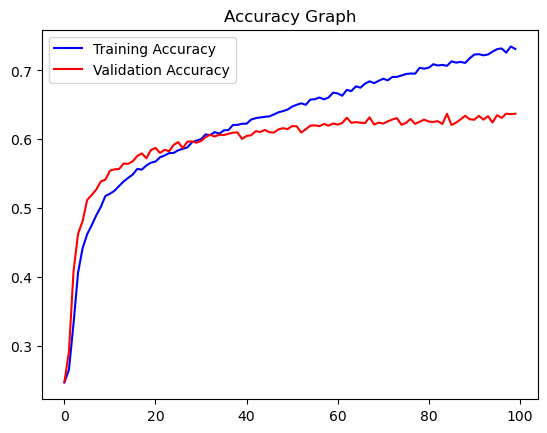

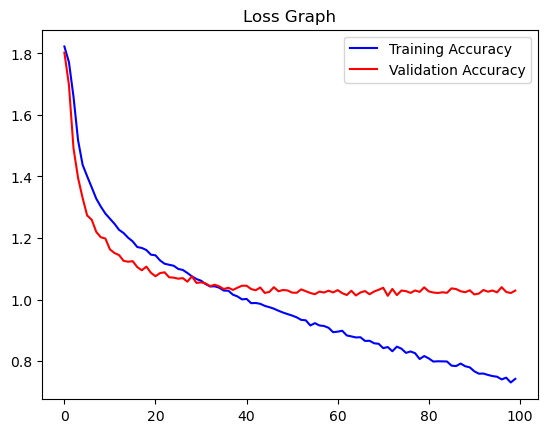

In [35]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss= history.history['loss']
val_loss= history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label= 'Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
#plt.figure()

plt.show()

In [ ]:
##test with image data

Original Output: happy
1/1 [==============================] - 0s 18ms/step
Predicted Output: happy


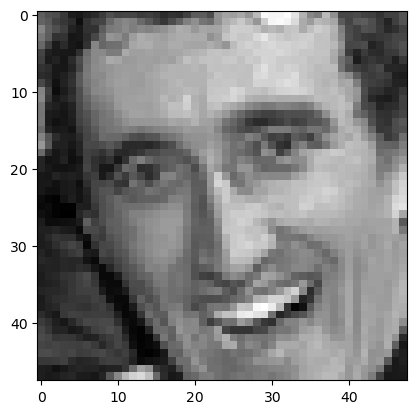

In [48]:
image_index = random.randint(0, len(test))
print('Original Output:', test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')